# Assignment 2 - Coordinates & Transforms
*8 points*

## Build your Turtlebot

Build the TortugaBot with Visualization Markers

Open Rviz. Set Global options > Fixed frame to `/world`

Add Markers (or MarkerArray and publish to /pycram/viz_marker)

```bash
roslaunch turtle_tf turtle_tf_demo.launch
```
Move turtle with arrow keys in the terminal

Execute the below python code blocks to publish arrow on the turtle1 frame

https://wiki.ros.org/rviz/DisplayTypes/Marker


## Example: How to publish markers

In [ ]:
import rospy
from visualization_msgs.msg import Marker, MarkerArray

In [ ]:
rospy.init_node('rviz_marker')
rate = rospy.Rate(5)

In [ ]:
marker = Marker()

marker.header.frame_id = "turtle1"
marker.header.stamp = rospy.Time.now()

# set shape, Arrow: 0; Cube: 1 ; Sphere: 2 ; Cylinder: 3
marker.type = 0
marker.id = 0

# Set the scale of the marker
marker.scale.x = 1.0
marker.scale.y = 0.5
marker.scale.z = 0.5

# Set the color
marker.color.r = 1.0
marker.color.g = 0.0
marker.color.b = 0.0
marker.color.a = 1.0

# Set the pose of the marker
marker.pose.position.x = 1
marker.pose.position.y = 0
marker.pose.position.z = 0
marker.pose.orientation.x = 0.0
marker.pose.orientation.y = 0.0
marker.pose.orientation.z = 0.0
marker.pose.orientation.w = 1.0

In [ ]:
marker_pub = rospy.Publisher("/visualization_marker", Marker, queue_size = 2)

In [ ]:
marker_pub.publish(marker)

Call ``sleep`` between multiple ``publish(marker)``. Otherwise, subsequent markers might not be published.

In [ ]:
rate.sleep()

## Example: How to use rotation

In [ ]:
from tf.transformations import euler_matrix, quaternion_from_matrix, rotation_from_matrix, euler_from_matrix

In [ ]:
# Standard rotation
r = euler_matrix(0,0,0)

In [ ]:
# All rotations are represented as matrices underneath.
r

In [ ]:
# Quaternion
quaternion_from_matrix(r)

In [ ]:
# Angle Rotations
angle, _, _ = rotation_from_matrix(r)
angle

In [ ]:
# Euler Angle
euler_from_matrix(r)

In [ ]:
import numpy as np

In [ ]:
r = euler_matrix(np.pi,0,0)

In [ ]:
q = quaternion_from_matrix(r)

In [ ]:
ax, ay, az, w = q

In [ ]:
marker.pose.orientation.x = ax
marker.pose.orientation.y = ay
marker.pose.orientation.z = az
marker.pose.orientation.w = w

In [ ]:
marker.id = 105

In [ ]:
marker_pub.publish(marker)

In [ ]:
import time

In [ ]:
splits = 10
bow_split = np.pi / splits

for i in range(0, splits * 2):
    r = euler_matrix(0, bow_split * i, 0)
    ax, ay, az, w = quaternion_from_matrix(r)
    marker.pose.orientation.x = ax
    marker.pose.orientation.y = ay
    marker.pose.orientation.z = az
    marker.pose.orientation.w = w
    marker.id = 100 + i
    marker_pub.publish(marker)
    rate.sleep()

# Tasks

## Task 1

After you have configured Rvizweb, save the settings on your local machine. This will save you time the next time you configure Rvizweb. 
Additionally, paste your source code here:
    
```bash
## Your config goes here:
# TODO
```

Whenever markers do not load properly, try removing and reinserting the marker display. If this doesn´t work, try refreshing Rvizweb and reinserting your config. 

## Task 2

Below you can see an example of a turtle. Use primitive shapes to build up the shape of the turtle. The color of the turtles should be randomized and the marker IDs should be generated by the method `id_generator`. Your code should be running without executing the given examples at the top.

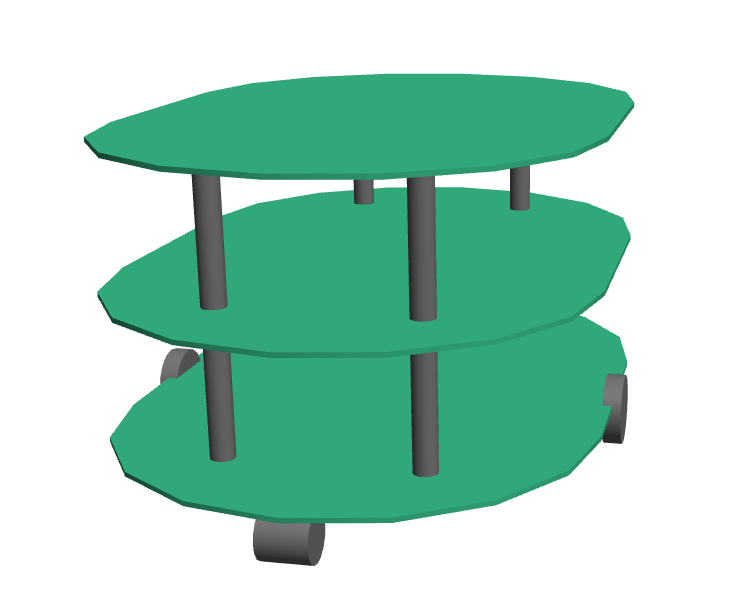

In [ ]:
# Your code
import rospy
from visualization_msgs.msg import Marker, MarkerArray
import geometry_msgs.msg
import std_msgs.msg
import tf.transformations as tf


rospy.init_node('rviz_marker')
rate = rospy.Rate(5)
markerArray_pub = rospy.Publisher("/visualization_marker_array", MarkerArray, queue_size = 2)

def create(frame = "", id = 0) -> Marker:
    """Helper function that set the values of a Marker and returns it. You have to add more method parameters like type, scale, color and pose.
   """
    # TODO
    pass
        
def id_generator(id):
    """Generates id`s and returns them one after another.
   """
    # TODO
    pass

def createTurtle(turtle, id = 0) -> MarkerArray:
    """Build the whole turtle (see picture) and returns it as a MarkerArray. The `id` is the starting value. It should be incremented.
   """
    next_id = id_generator(id)
    # next(next_id)
    
    # TODO
    pass

In [ ]:
turtle1 = createTurtle("turtle1", 100)
markerArray_pub.publish(turtle1)
rate.sleep()

In [ ]:
turtle2 = createTurtle("turtle2", 200)
markerArray_pub.publish(turtle2)
rate.sleep()

## Task 3

Visualize the path that `/turtle1` has taken by spawning markers on its position. The markers should be removed after 3 seconds. So only the last 3 seconds of the path are visualized.

The subscriber is already given. Insert your code into the `callback(msg)` function.

In [ ]:
import rospy
from geometry_msgs.msg import Pose

def callback(msg):
    """Called then a new pose of turtle1 is published. Publishe a SPEHER marker on the position of the turtle.
   """
    # TODO
    pass

turtle_sub = rospy.Subscriber('/turtle1/pose', Pose, callback)
rospy.spin()